In [7]:
%matplotlib inline
from importlib import reload

In [8]:
import re, time, os.path as path
from datetime import date
from math import floor
from concurrent.futures import ThreadPoolExecutor, as_completed

from lib import my_types, count
[reload(m) for m in (my_types, count)]

start = time.perf_counter()

max_workers = 15
root_dir = "/home/bwhite/Projects/bryanchriswhite"
repo_names = [
    "storj",
    "uplink",
    "uplink-c"
]
author_regex = re.compile("\S+\s+\(([\w ]+)\s*?\d{4,}")
commit_re = re.compile("^(\w+)\s+\(.*,\s+(\d{4,}-\d{2,}-\d{2,})\)$")
excluded_exts = set()
repo_counts: my_types.AllRepoFileAuthors = {}

def filter_ext(filename):
    ext = path.splitext(filename)[1]
    ext_whitelist = (
        ".go", ".proto", ".c", ".h", ".sh", ".md", ".xml", ".wixproj", ".wsx", ".cs"
    )
    exclude = filename == "" or ext not in ext_whitelist
    
    if exclude:
        excluded_exts.add(ext)
    
    return exclude

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    results = {}
    for name in repo_names:
        repo_root = path.join(root_dir, name)
        results[name] = count.repo(executor, repo_root, filter_func=filter_ext)

    for name, future in results.items():
        repo_counts[name] = {k: v.result() for k, v in future.items()}

end = time.perf_counter()
print(str.format("done: {}s!", round(end - start, 2)))
print(str.format("excluded file extensions: {}", excluded_exts))

done: 6.79s!
excluded file extensions: {'', '.properties', '.bmp', '.zip', '.rtf', '.bat', '.csv', '.csproj', '.jpg', '.pem', '.snap', '.ico', '.service', '.json', '.public', '.pro', '.png', '.yaml', '.sln', '.pom', '.ttf', '.lock', '.tmpl', '.html', '.gif', '.mod', '.dbx', '.config', '.scss', '.css', '.pdf', '.svg', '.java', '.js', '.key', '.sum', '.vue', '.jar', '.wxs', '.cert', '.gradle', '.py', '.ts', '.sql'}


In [9]:
from typing import List, Tuple, Dict

from lib import git
reload(git)

max_samples = 128
samples: List[Tuple[date, str]] = []
commits: Dict[str, date] = {}
log_lines = git.log(path.join(root_dir, repo_names[2]), "master")
for line in log_lines:
    if line == "":
        continue

    match = commit_re.match(line)
    if match is None:
        continue

    commit_hash, commit_date = [match[k] for k in (range(1, 3))]

    if commit_hash is None or commit_date is None:
        print("no commit hash or date")
        continue

    commits[commit_hash] = date.fromisoformat(commit_date)

date_hashes: List[Tuple[date, str]] = [(d, h) for h, d in commits.items()]
date_hashes.sort(key=lambda n: n[0], reverse=True)

date_hashes_len = len(date_hashes)
if max_samples > date_hashes_len:
    max_samples = date_hashes_len

interval = floor(len(date_hashes) / max_samples)

for i, date_hash in enumerate(date_hashes):
    if i % interval == 0:
        samples.append(date_hash)

max_worktrees = 10

In [10]:
# from time import sleep
#
# from lib import worktree_queue
# reload(worktree_queue)
#
# with WorktreeQueue("/home/bwhite/Projects/bryanchriswhite/uplink", 10) as q:
#     for 
#
#     print(q.get_root())
#     sleep(2)


In [11]:
from lib import report, util
reload(report)

totals_dict, total_lines = util.repo_counts_to_totals_dict(repo_counts)
report.leaderboard(totals_dict)


storj
#1: Egon Elbre (14.95% | 24772)
#2: paul cannon (9.17% | 15203)
#3: Michal Niewrzal (6.96% | 11536)
#4: Jeff Wendling (6.66% | 11042)
#5: Yaroslav Vorobiov (6.62% | 10977)
#6: Isaac Hess (4.81% | 7975)
#7: Bryan White (4.6% | 7626)
#8: Yingrong Zhao (3.44% | 5700)
#9: Maximillian von Briesen (3.03% | 5020)
#10: Natalie Villasana (2.91% | 4820)

uplink
#1: Kaloyan Raev (31.97% | 3608)
#2: Egon Elbre (25.52% | 2881)
#3: Michal Niewrzal (22.86% | 2580)
#4: JT Olio (4.61% | 520)
#5: Ivan Fraixedes (2.49% | 281)
#6: Maximillian von Briesen (2.04% | 230)
#7: Jeff Wendling (1.9% | 214)
#8: Natalie Villasana (1.51% | 170)
#9: ccase (1.28% | 145)
#10: Jess G (0.89% | 101)

uplink-c
#1: Egon Elbre (85.13% | 2593)
#2: Michal Niewrzal (12.34% | 376)
#3: Kaloyan Raev (2.53% | 77)



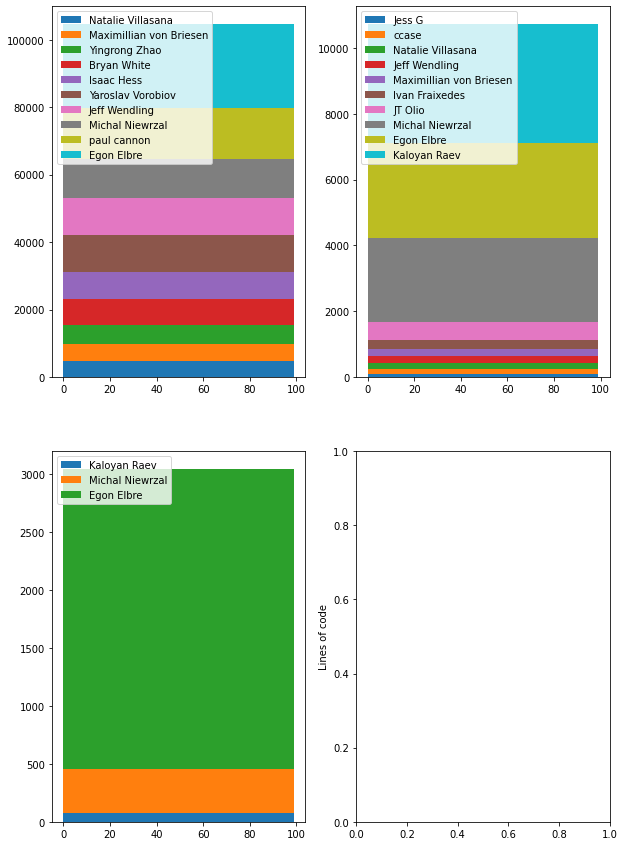

In [13]:
from lib import graph
reload(graph)

graph.repo_stackplots(totals_dict)

In [ ]:
# from github import Github
#
# apikey = open("github.apikey")
#
# g = Github()
# org = g.get_organization("storj")
# repos = org.get_repos()
# page = repos.get_page(0)
#
# storj_repos = page

In [ ]:
# [(r.name, r.created_at) for r in storj_repos]